In [1]:

!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 25.0MB 5.1MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 147kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [2]:
from google.colab import drive
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
drive.mount('/content/drive',force_remount=True)
from google.colab import files
from io import BytesIO
from PIL import Image
from matplotlib import pyplot as plt


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
uploaded = files.upload()
middle = Image.open(BytesIO(uploaded['middle.jpg']))

uploaded = files.upload()
left = Image.open(BytesIO(uploaded['left.jpg']))

uploaded = files.upload()
right = Image.open(BytesIO(uploaded['right.jpg']))

Saving middle.jpg to middle.jpg


Saving left.jpg to left.jpg


Saving right.jpg to right.jpg


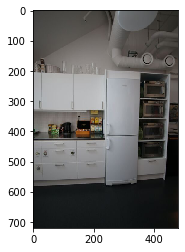

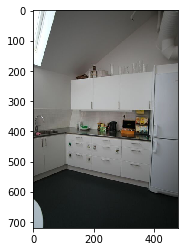

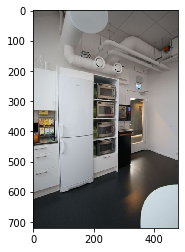

In [4]:
plt.imshow(middle)
plt.show()

plt.imshow(left)
plt.show()

plt.imshow(right)
plt.show()

In [0]:
middle_np = np.asarray(middle)
left_np = np.asarray(left)
right_np = np.asarray(right)

In [0]:
minHessian = 400
detector = cv2.xfeatures2d_SURF.create(hessianThreshold = minHessian)
keypoints1, descriptors1 = detector.detectAndCompute(middle_np, None)
keypoints2, descriptors2 = detector.detectAndCompute(left_np, None)
keypoints3, descriptors3 = detector.detectAndCompute(right_np, None)



In [0]:
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
knn_matches = matcher.knnMatch(descriptors1, descriptors3, 2)

In [0]:
ratio_thresh = 0.7
good_matches = []
for m,n in knn_matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)


In [11]:
img_matches = np.empty((max(middle_np.shape[0], right_np.shape[0]), middle_np.shape[1]+right_np.shape[1], 3), dtype=np.uint8)
cv2.drawMatches(middle_np, keypoints1, right_np, keypoints3, good_matches, img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

array([[[ 62,  61,  59],
        [ 62,  61,  59],
        [ 62,  61,  59],
        ...,
        [ 85,  81,  78],
        [ 85,  81,  78],
        [ 85,  81,  78]],

       [[ 62,  61,  59],
        [ 62,  61,  59],
        [ 62,  61,  59],
        ...,
        [ 85,  81,  78],
        [ 85,  81,  78],
        [ 85,  81,  78]],

       [[ 62,  61,  59],
        [ 62,  61,  59],
        [ 62,  61,  59],
        ...,
        [ 85,  81,  78],
        [ 85,  81,  78],
        [ 85,  81,  78]],

       ...,

       [[ 15,  19,  20],
        [ 15,  19,  20],
        [ 15,  19,  20],
        ...,
        [176, 189, 195],
        [176, 189, 195],
        [176, 189, 195]],

       [[ 15,  19,  20],
        [ 15,  19,  20],
        [ 15,  19,  20],
        ...,
        [176, 189, 195],
        [176, 189, 195],
        [176, 189, 195]],

       [[ 15,  19,  20],
        [ 15,  19,  20],
        [ 15,  19,  20],
        ...,
        [176, 189, 195],
        [176, 189, 195],
        [176, 189, 195]]

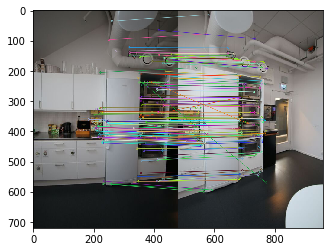

In [12]:
plt.imshow(img_matches)
plt.show()

In [13]:
cv2.imwrite('drive/My Drive/EE569-Reports/feature_match_middle_right.jpeg', img_matches)

True

[[ 5.40711593e-01 -2.51687941e-02  1.85914301e+02]
 [-3.14973150e-01  8.43225933e-01  5.19069626e+01]
 [-9.41839566e-04  4.37683871e-06  1.00000000e+00]]


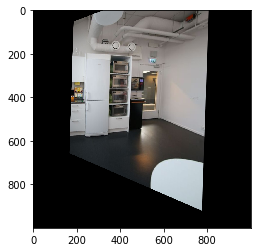

True

In [25]:
obj = np.empty((len(good_matches),2), dtype=np.float32)
scene = np.empty((len(good_matches),2), dtype=np.float32)
for i in range(len(good_matches)):
    #-- Get the keypoints from the good matches
    try:
      obj[i,0] = keypoints1[good_matches[i].queryIdx].pt[0]
      obj[i,1] = keypoints1[good_matches[i].queryIdx].pt[1]
      scene[i,0] = keypoints2[good_matches[i].trainIdx].pt[0]
      scene[i,1] = keypoints2[good_matches[i].trainIdx].pt[1]
    except IndexError:
      continue
H, _ =  cv2.findHomography(obj, scene, cv2.RANSAC)
print(H)

warpedImage = cv2.warpPerspective(left_np, H, (2000, 1500))
plt.imshow(warpedImage)
plt.show()
cv2.imwrite('drive/My Drive/EE569-Reports/warpedImage.jpeg', warpedImage)

[[-1.09983136e+01  2.67510394e-01  1.55327437e+03]
 [-8.60849818e+00 -2.54597342e+00  2.10115424e+03]
 [-1.61620692e-02  8.64037213e-04  1.00000000e+00]]


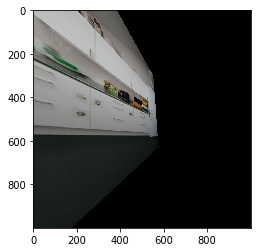

True

In [26]:
middlePoints = np.array([[248.5, 522.5],[242.5, 176.5],[296.5, 501.5],[249.5, 336.5]])
leftPoints = np.array([[405.5, 533.5],[385.5, 157.5],[468.5, 514.5],[401.5, 329.5]])
H, s = cv2.findHomography(middlePoints, leftPoints, cv2.RANSAC, 4)
print(H)

warpedImage = cv2.warpPerspective(left_np, H, (1000, 1000))
plt.imshow(warpedImage)
plt.show()


cv2.imwrite('drive/My Drive/EE569-Reports/LeftwarpedImage.jpeg', warpedImage)